United States Average Death data - due to covid-19 (from 1 January 2020 to 15 December 2020)

In [3]:
# Import libraries
import pandas as pd 
import matplotlib.pyplot as plt 

In [4]:
# Import data from file
deaths = pd.read_csv("avg_deaths.csv")
deaths

,Month,New_deaths
0,1,0
1,2,0
2,3,77
3,4,1844
4,5,1448
5,6,785
6,7,769
7,8,1020
8,9,739
9,10,751


In [5]:
import calendar
calendar.monthrange(2020,1) #here 2=month and 31=year

(2, 31)

In [6]:
_,num_days = calendar.monthrange(2020,1)  # drop month using underscore
num_days

31

In [7]:
deaths["num_days"] = 0    # initially add a column num_days filled with data 0
deaths["year"] = 2020     # Add an year column (year=2020)

In [8]:
deaths   # checking if both columns added

,Month,New_deaths,num_days,year
0,1,0,0,2020
1,2,0,0,2020
2,3,77,0,2020
3,4,1844,0,2020
4,5,1448,0,2020
5,6,785,0,2020
6,7,769,0,2020
7,8,1020,0,2020
8,9,739,0,2020
9,10,751,0,2020


In [9]:
deaths.columns

Index(['Month', 'New_deaths', 'num_days', 'year'], dtype='object')

In [10]:
deaths = deaths[['year','Month','num_days' ,'New_deaths', ]] # arranging column names
deaths

,year,Month,num_days,New_deaths
0,2020,1,0,0
1,2020,2,0,0
2,2020,3,0,77
3,2020,4,0,1844
4,2020,5,0,1448
5,2020,6,0,785
6,2020,7,0,769
7,2020,8,0,1020
8,2020,9,0,739
9,2020,10,0,751


In [11]:
deaths.columns = ['Year','Month','Num_days' ,'New_deaths', ]  # rename all column names
deaths

,Year,Month,Num_days,New_deaths
0,2020,1,0,0
1,2020,2,0,0
2,2020,3,0,77
3,2020,4,0,1844
4,2020,5,0,1448
5,2020,6,0,785
6,2020,7,0,769
7,2020,8,0,1020
8,2020,9,0,739
9,2020,10,0,751


* Adding data in Num_days column
* Adding Monthly daeths column
* Adding cummulative deaths column

In [12]:
# add data in Num_days using function
def days(year,month):     # creating function for year and month
    _, num_days = calendar.monthrange(year, month)
    return num_days

In [13]:
deaths

,Year,Month,Num_days,New_deaths
0,2020,1,0,0
1,2020,2,0,0
2,2020,3,0,77
3,2020,4,0,1844
4,2020,5,0,1448
5,2020,6,0,785
6,2020,7,0,769
7,2020,8,0,1020
8,2020,9,0,739
9,2020,10,0,751


In [14]:
deaths.iloc[0]["Month"]   # extract data of 0 from month column

1

In [15]:
days = (deaths[["Year", "Month"]]).apply(lambda row:days(row["Year"],row["Month"]), axis = 1)

In [16]:
deaths.Num_days = days
deaths.loc[11, "Num_days"]//=2  
#it changes dec data month days from 30 tio 15 (because data is from 1 jan to 15 Dec 2020 )

# another way
# deaths.loc[11, "Num_days"] = 15

In [17]:
deaths   # checking if december day changes

,Year,Month,Num_days,New_deaths
0,2020,1,31,0
1,2020,2,29,0
2,2020,3,31,77
3,2020,4,30,1844
4,2020,5,31,1448
5,2020,6,30,785
6,2020,7,31,769
7,2020,8,31,1020
8,2020,9,30,739
9,2020,10,31,751


In [18]:
deaths["Monthly_deaths"] = deaths.Num_days.mul(deaths.New_deaths)
# add Monthly deaths column in data 
# Monthly deaths = Numdays * New deaths

In [19]:
deaths   # check whether Monthly deaths data added

,Year,Month,Num_days,New_deaths,Monthly_deaths
0,2020,1,31,0,0
1,2020,2,29,0,0
2,2020,3,31,77,2387
3,2020,4,30,1844,55320
4,2020,5,31,1448,44888
5,2020,6,30,785,23550
6,2020,7,31,769,23839
7,2020,8,31,1020,31620
8,2020,9,30,739,22170
9,2020,10,31,751,23281


In [20]:
deaths.rename({"New_deaths":"Avg_deaths"}, axis = 1, inplace = True)

In [21]:
deaths["Cum_deaths"] = deaths.Monthly_deaths.cumsum()
# add Cumulative death sum column in data

In [22]:
deaths

,Year,Month,Num_days,Avg_deaths,Monthly_deaths,Cum_deaths
0,2020,1,31,0,0,0
1,2020,2,29,0,0,0
2,2020,3,31,77,2387,2387
3,2020,4,30,1844,55320,57707
4,2020,5,31,1448,44888,102595
5,2020,6,30,785,23550,126145
6,2020,7,31,769,23839,149984
7,2020,8,31,1020,31620,181604
8,2020,9,30,739,22170,203774
9,2020,10,31,751,23281,227055


For plotting graphs divide months:
* Jan - March => 1 - 3
* March - Jun => 3 - 6
* Jun - Oct => 6 - 10
* Oct - Dec => 10 - 12

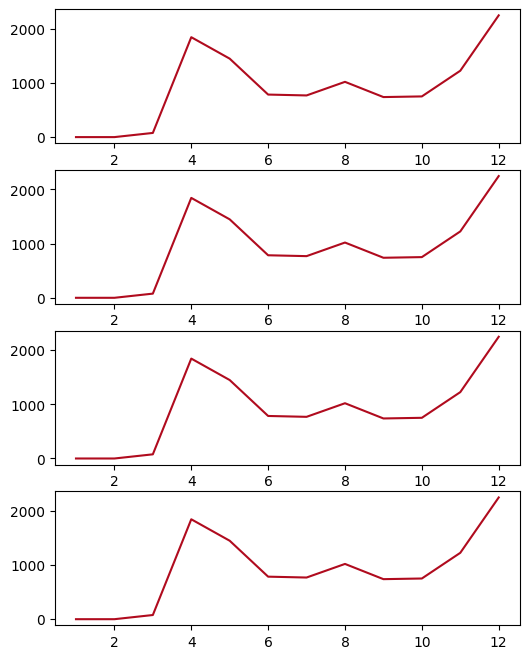

In [23]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6,8))

axes = [ax1, ax2, ax3, ax4]
# plot 4graphs:
# First for Jan to March data, Second for March to Jun data
# Third for Jun to Oct data, Fourth for Oct to Dec data

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e")
plt.show()

Remove xticks and yticks and params

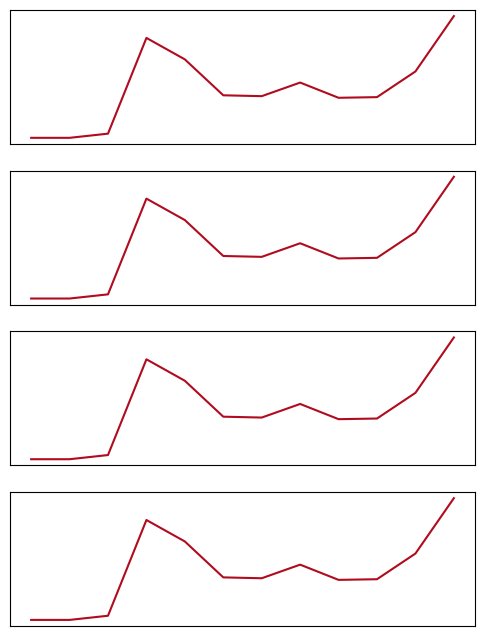

In [24]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6,8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e")

    # Data Ink, Data Element
    ax.set_xticklabels([])     # remove xticks
    ax.set_yticklabels([])     # remove yticks

    # Non Data Ink -> removing Structural element
    ax.tick_params(bottom = False, left = False) 

plt.show()

Remove xticks and yticks, params and borderlines(spines)

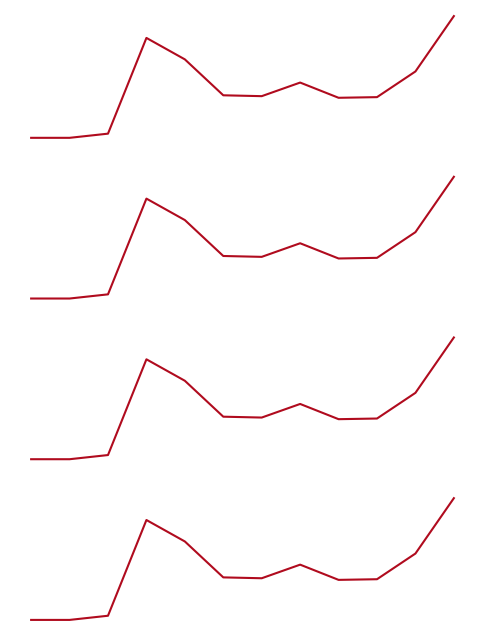

In [25]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6,8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e")

    # Data Ink, Data Element
    ax.set_xticklabels([])     # remove xticks
    ax.set_yticklabels([])     # remove yticks

    # Non Data Ink -> removing Structural element
    ax.tick_params(bottom = False, left = False) 

    # remove border lines
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
plt.show()

* Remove xticks and yticks, params and borderlines(spines)
* Add color and also dim the color of graph (using alpha)

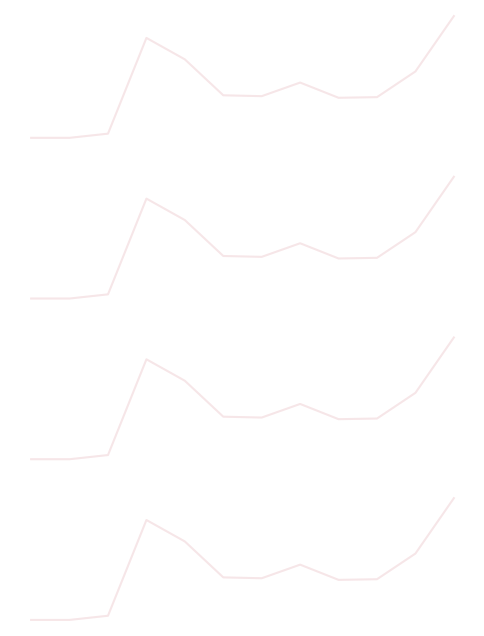

In [26]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6,8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1)
    # here color and alpha added

    # Data Ink, Data Element
    ax.set_xticklabels([])     # remove xticks
    ax.set_yticklabels([])     # remove yticks

    # Non Data Ink -> removing Structural element
    ax.tick_params(bottom = False, left = False) 

    # remove border lines
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
plt.show()

* Remove xticks and yticks, params and borderlines(spines)
* Add color and also dim the color of graph (using alpha)
* To add lines for each data

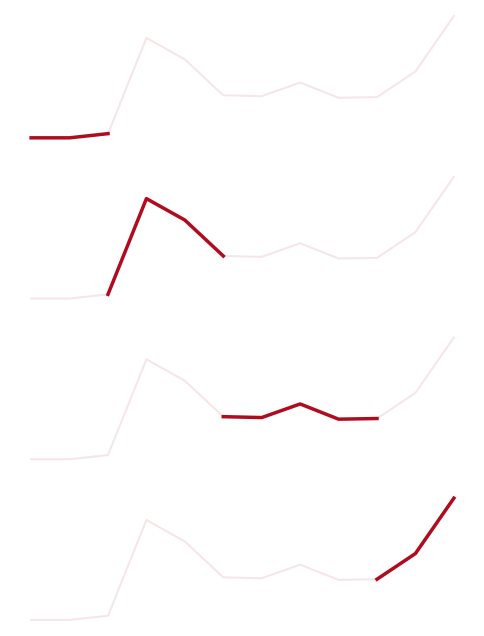

In [27]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6,8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1)
    # here color and alpha added

    # Data Ink, Data Element
    ax.set_xticklabels([])     # remove xticks
    ax.set_yticklabels([])     # remove yticks

    # Non Data Ink -> removing Structural element
    ax.tick_params(bottom = False, left = False) 

    # remove border lines
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)

# linewidth added (optional)
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e", linewidth = 2.5)     #for Jan to March data
ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)   #for March to June data 
ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5) #for June to Oct data
ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5)     #for Oct to Dec data

plt.show()

* Remove xticks and yticks, params and borderlines(spines)
* Add color and also dim the color of graph (using alpha)
* To add lines for each data
* Add xaxis text on first graph to explain it.

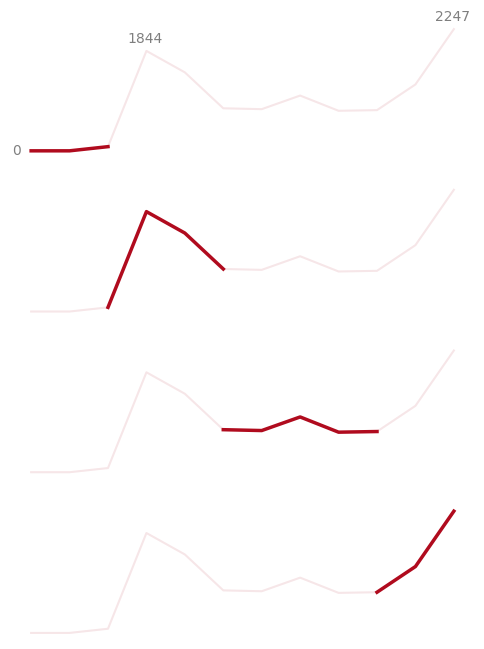

In [28]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6,8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1)
    # here color and alpha added

    # Data Ink, Data Element
    ax.set_xticklabels([])     # remove xticks
    ax.set_yticklabels([])     # remove yticks

    # Non Data Ink -> removing Structural element
    ax.tick_params(bottom = False, left = False) 

    # remove border lines
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)

# linewidth added (optional)
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e", linewidth = 2.5)     #for Jan to March data

# Add text for first graph
ax1.text(x = 0.5, y= -80, s = "0", alpha = 0.5) 
ax1.text(x = 3.5, y= 2000, s = "1844", alpha = 0.5)
ax1.text(x = 11.5, y= 2400, s = "2247", alpha = 0.5)

ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)   #for March to June data 
ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5) #for June to Oct data
ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5)     #for Oct to Dec data

plt.show()

* Remove xticks and yticks, params and borderlines(spines)
* Add color and also dim the color of graph (using alpha)
* To add lines for each data
* Add xaxis text on first graph to explain it.
* Add text for all four plots.
* Add title and subtitle on plot.

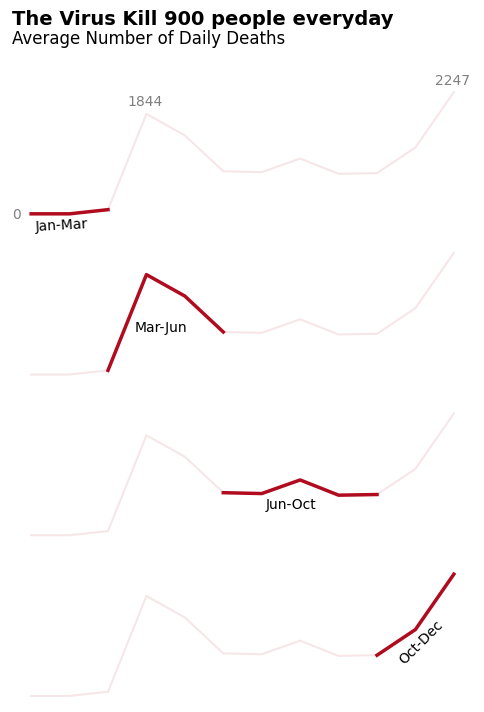

In [29]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6,8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1)
    # here color and alpha added

    # Data Ink, Data Element
    ax.set_xticklabels([])     # remove xticks
    ax.set_yticklabels([])     # remove yticks

    # Non Data Ink -> removing Structural element
    ax.tick_params(bottom = False, left = False) 

    # remove border lines
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)

# linewidth added (optional)
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e", linewidth = 2.5)     #for Jan to March data

# Add text for first graph (#decoration)
ax1.text(x = 0.5, y= -80, s = "0", alpha = 0.5) 
ax1.text(x = 3.5, y= 2000, s = "1844", alpha = 0.5)
ax1.text(x = 11.5, y= 2400, s = "2247", alpha = 0.5)
ax1.text(x = 1.1, y= -300, s = "Jan-Mar", rotation = 3)

# Add title and subtitle
ax1.text(0.5, 3500, "The Virus Kill 900 people everyday", size = 14, weight = "bold")
ax1.text(0.5, 3150, "Average Number of Daily Deaths", size = 12,)

ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)   #for March to June data 
ax2.text(x = 3.7, y= 800, s = "Mar-Jun")

ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5) #for June to Oct data
ax3.text(x = 7.1, y= 500, s = "Jun-Oct")

ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5)     #for Oct to Dec data
ax4.text(x = 10.5, y= 600, s = "Oct-Dec", rotation = 45)

plt.show()

In [30]:
deaths["Avg_deaths"].mean()

908.75

In [31]:
cum_cases = [deaths.loc[2,"Cum_deaths" ],deaths.loc[5,"Cum_deaths"],deaths.loc[9,"Cum_deaths" ],
            deaths.loc[11,"Cum_deaths" ]]
cum_cases

[2387, 126145, 227055, 297510]

* Remove xticks and yticks, params and borderlines(spines)
* Add color and also dim the color of graph (using alpha)
* To add lines for each data
* Add xaxis text on first graph to explain it.
* Add text for all four plots.
* Add title and subtitle on plot.
* Add blank progress bar on each plot

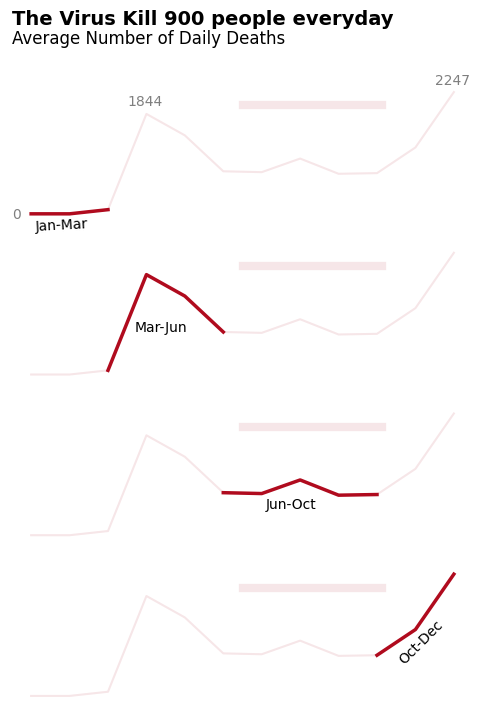

In [32]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6,8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1)
    # here color and alpha added

    # Data Ink, Data Element
    ax.set_xticklabels([])     # remove xticks
    ax.set_yticklabels([])     # remove yticks

    # Non Data Ink -> removing Structural element
    ax.tick_params(bottom = False, left = False) 

    # remove border lines
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)

# linewidth added (optional)
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e", linewidth = 2.5)     #for Jan to March data

# Add text for first graph (#decoration)
ax1.text(x = 0.5, y= -80, s = "0", alpha = 0.5) 
ax1.text(x = 3.5, y= 2000, s = "1844", alpha = 0.5)
ax1.text(x = 11.5, y= 2400, s = "2247", alpha = 0.5)
ax1.text(x = 1.1, y= -300, s = "Jan-Mar", rotation = 3)

# Add title and subtitle
ax1.text(0.5, 3500, "The Virus Kill 900 people everyday", size = 14, weight = "bold")
ax1.text(0.5, 3150, "Average Number of Daily Deaths", size = 12,)

ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)   #for March to June data 
ax2.text(x = 3.7, y= 800, s = "Mar-Jun")

ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5) #for June to Oct data
ax3.text(x = 7.1, y= 500, s = "Jun-Oct")

ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5)     #for Oct to Dec data
ax4.text(x = 10.5, y= 600, s = "Oct-Dec", rotation = 45)

# Add blank progressbar(horizontalbar) on each plot
for ax in axes:
    ax.axhline(y = 2000, xmin = 0.5, xmax = 0.8, c = "#b00b1e", linewidth = 6, alpha = 0.1)

plt.show()

Concepts

In [33]:
pro = [round(i/cum_cases[-1], 2) for i in cum_cases]
pro

[0.01, 0.42, 0.76, 1.0]

How it works:

```python
proportions = []

for i in cum_cases:
    v = i/297510
    final = round(v,2)
    # print(final)
    proportions.append(final)
```

---

* Remove xticks and yticks, params and borderlines(spines)
* Add color and also dim the color of graph (using alpha)
* To add lines for each data
* Add xaxis text on first graph to explain it.
* Add text for all four plots.
* Add title and subtitle on plot.
* Add blank and filled progress bar on each plot

In [34]:
pro = [round(i/cum_cases[-1], 2) for i in cum_cases]
pro

# here i value divided with cum_cases with the difference of 2
# round use to roundoffdata
# but the result came between 0.01 to 1.0 (but in actual data max value = 0.8)
# So, we need to adjust it

[0.01, 0.42, 0.76, 1.0]

In [35]:
xmaxs = [0.5 + i*(0.8-0.5) for i in pro]
xmaxs

# here 0.5 means half
# i list comprehension
# 0.8-0.5 = 0.3 (here 0.8 is max value)

[0.503, 0.626, 0.728, 0.8]

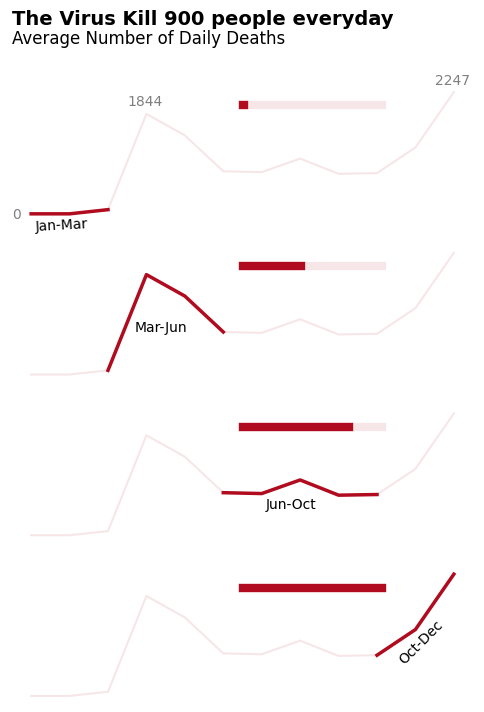

In [36]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6,8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1)
    # here color and alpha added

    # Data Ink, Data Element
    ax.set_xticklabels([])     # remove xticks
    ax.set_yticklabels([])     # remove yticks

    # Non Data Ink -> removing Structural element
    ax.tick_params(bottom = False, left = False) 

    # remove border lines
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)

# linewidth added (optional)
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e", linewidth = 2.5)     #for Jan to March data

# Add text for first graph (#decoration)
ax1.text(x = 0.5, y= -80, s = "0", alpha = 0.5) 
ax1.text(x = 3.5, y= 2000, s = "1844", alpha = 0.5)
ax1.text(x = 11.5, y= 2400, s = "2247", alpha = 0.5)
ax1.text(x = 1.1, y= -300, s = "Jan-Mar", rotation = 3)

# Add title and subtitle
ax1.text(0.5, 3500, "The Virus Kill 900 people everyday", size = 14, weight = "bold")
ax1.text(0.5, 3150, "Average Number of Daily Deaths", size = 12,)

ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)   #for March to June data 
ax2.text(x = 3.7, y= 800, s = "Mar-Jun")

ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5) #for June to Oct data
ax3.text(x = 7.1, y= 500, s = "Jun-Oct")

ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5)     #for Oct to Dec data
ax4.text(x = 10.5, y= 600, s = "Oct-Dec", rotation = 45)

# Add progressbar(horizontalbar) on each plot
for ax, xmax in zip(axes, xmaxs):
    ax.axhline(y = 2000, xmin = 0.5, xmax = 0.8, c = "#b00b1e", linewidth = 6, alpha = 0.1) #blankbar
    ax.axhline(y = 2000, xmin = 0.5, xmax = xmax, c = "#b00b1e", linewidth = 6)      #filledbar

plt.show()

* Remove xticks and yticks, params and borderlines(spines)
* Add color and also dim the color of graph (using alpha)
* To add lines for each data
* Add xaxis text on first graph to explain it.
* Add text for all four plots.
* Add title and subtitle on plot.
* Add blank and filled progress bar on each plot
* Add Cumulative cases on each progress bar.

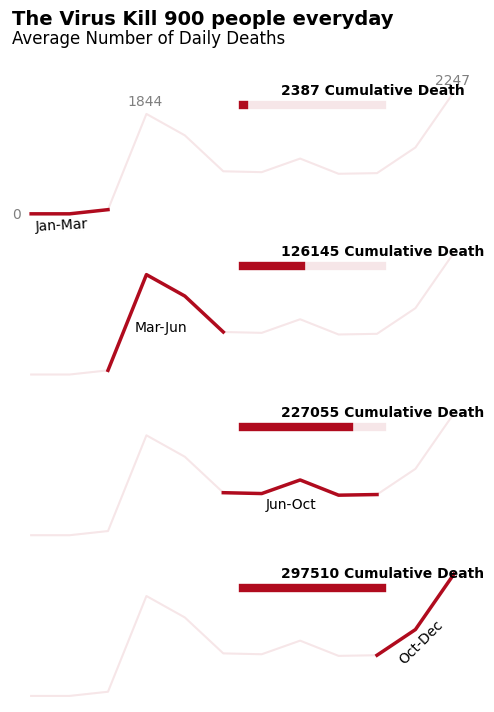

In [43]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6,8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1)
    # here color and alpha added

    # Data Ink, Data Element
    ax.set_xticklabels([])     # remove xticks
    ax.set_yticklabels([])     # remove yticks

    # Non Data Ink -> removing Structural element
    ax.tick_params(bottom = False, left = False) 

    # remove border lines
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)

# linewidth added (optional)
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e", linewidth = 2.5)     #for Jan to March data

# Add text for first graph (#decoration)
ax1.text(x = 0.5, y= -80, s = "0", alpha = 0.5) 
ax1.text(x = 3.5, y= 2000, s = "1844", alpha = 0.5)
ax1.text(x = 11.5, y= 2400, s = "2247", alpha = 0.5)
ax1.text(x = 1.1, y= -300, s = "Jan-Mar", rotation = 3)

# Add title and subtitle
ax1.text(0.5, 3500, "The Virus Kill 900 people everyday", size = 14, weight = "bold")
ax1.text(0.5, 3150, "Average Number of Daily Deaths", size = 12,)

ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)   #for March to June data 
ax2.text(x = 3.7, y= 800, s = "Mar-Jun")

ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5) #for June to Oct data
ax3.text(x = 7.1, y= 500, s = "Jun-Oct")

ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5)     #for Oct to Dec data
ax4.text(x = 10.5, y= 600, s = "Oct-Dec", rotation = 45)

# Add progressbar(horizontalbar) on each plot
for ax,death, xmax in zip(axes, cum_cases, xmaxs):
    ax.axhline(y = 2000, xmin = 0.5, xmax = 0.8, c = "#b00b1e", linewidth = 6, alpha = 0.1) #blankbar
    ax.axhline(y = 2000, xmin = 0.5, xmax = xmax, c = "#b00b1e", linewidth = 6)      #filledbar
    ax.text(x = 7.5 , y = 2200 , s = str(death) + " Cumulative Death", weight = "bold",)  #add text on each bar

plt.show()

To get xaxis and yaxis of plot

In [44]:
print(ax1.get_xticks())
print(ax1.get_yticks())

[ 0.  2.  4.  6.  8. 10. 12. 14.]
[-1000.     0.  1000.  2000.  3000.]


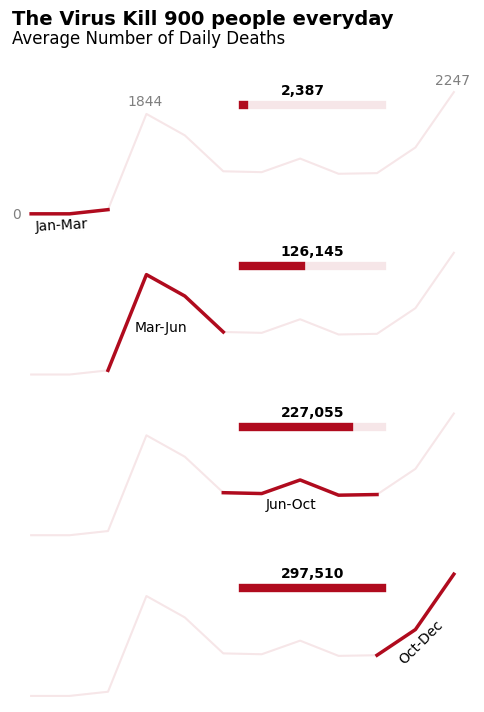

In [45]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6,8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1)
    # here color and alpha added

    # Data Ink, Data Element
    ax.set_xticklabels([])     # remove xticks
    ax.set_yticklabels([])     # remove yticks

    # Non Data Ink -> removing Structural element
    ax.tick_params(bottom = False, left = False) 

    # remove border lines
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)

# linewidth added (optional)
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e", linewidth = 2.5)     #for Jan to March data

# Add text for first graph (#decoration)
ax1.text(x = 0.5, y= -80, s = "0", alpha = 0.5) 
ax1.text(x = 3.5, y= 2000, s = "1844", alpha = 0.5)
ax1.text(x = 11.5, y= 2400, s = "2247", alpha = 0.5)
ax1.text(x = 1.1, y= -300, s = "Jan-Mar", rotation = 3)

# Add title and subtitle
ax1.text(0.5, 3500, "The Virus Kill 900 people everyday", size = 14, weight = "bold")
ax1.text(0.5, 3150, "Average Number of Daily Deaths", size = 12,)

ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)   #for March to June data 
ax2.text(x = 3.7, y= 800, s = "Mar-Jun")

ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5) #for June to Oct data
ax3.text(x = 7.1, y= 500, s = "Jun-Oct")

ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5)     #for Oct to Dec data
ax4.text(x = 10.5, y= 600, s = "Oct-Dec", rotation = 45)

# Add progressbar(horizontalbar) on each plot
for ax,death, xmax in zip(axes, cum_cases, xmaxs):
    ax.axhline(y = 2000, xmin = 0.5, xmax = 0.8, c = "#b00b1e", linewidth = 6, alpha = 0.1) #blankbar
    ax.axhline(y = 2000, xmin = 0.5, xmax = xmax, c = "#b00b1e", linewidth = 6)      #filledbar
    ax.text(x = 7.5 , y = 2200 , s = format(death, ","), weight = "bold",)  #add text on each bar

plt.show()